In [34]:
print("Downloading Example Data")
import os
import requests
from tqdm import tqdm  # Progress bar for large files

# Define file URLs (modified for direct download)
files = {
    "Comparing_min_1.rhs": "https://livejohnshopkins-my.sharepoint.com/personal/schoi84_jh_edu/_layouts/15/download.aspx?share=EVTWvyqK4xhKsY5qB5Qyh_8BxxgBxHvGOWIukrll2kqsNA",
    "Comparing_min_2.rhs": "https://livejohnshopkins-my.sharepoint.com/personal/schoi84_jh_edu/_layouts/15/download.aspx?share=Eb6qow3n7DhPqFLX58JoQDoBn4r3-3mK4CjJ8wNE8k873A"
}

# Destination folder
destination_folder = "../ExampleData/"
os.makedirs(destination_folder, exist_ok=True)

# Function to download a file with a progress bar
def download_file(file_name, url):
    file_path = os.path.join(destination_folder, file_name)
    
    if os.path.exists(file_path):
        print(f"File already exists: {file_path}")
        return

    print(f"Downloading {file_name} to {file_path}...")
    
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        total_size = int(response.headers.get("content-length", 0))
        with open(file_path, "wb") as file, tqdm(
            desc=file_name,
            total=total_size,
            unit="B",
            unit_scale=True,
            unit_divisor=1024,
        ) as bar:
            for chunk in response.iter_content(chunk_size=1024):
                file.write(chunk)
                bar.update(len(chunk))
        print("Download complete!")
    else:
        print(f"Error downloading {file_name}. Check your link.")

# Download all files
for file_name, url in files.items():
    download_file(file_name, url)


File already exists: ../ExampleData/Comparing_min_1.rhs
File already exists: ../ExampleData/Comparing_min_2.rhs


In [35]:
import sys
import os
%matplotlib inline
# Add necessary paths
sys.path.append(os.path.abspath("../"))
from electrophysiology_mapping import preprocessing
from electrophysiology_mapping.spike import *


Reading Intan Technologies RHS Data File, Version 3.3

Found 17 amplifier channels.
Found 0 board ADC channels.
Found 0 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

File contains 60.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
numsamples and numblocks
1800064
14063
FINISHED HEADER

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 2.6 seconds

Reading Intan Technologies RHS Data File, Version 3.3

Found 17 amplifier channels.
Found 0 board ADC channels.
Found 0 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

File contains 60.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
numsamples and numblocks
1800064
14063
FINISHED HEADER

Allocating memory for data...
Reading data from fi

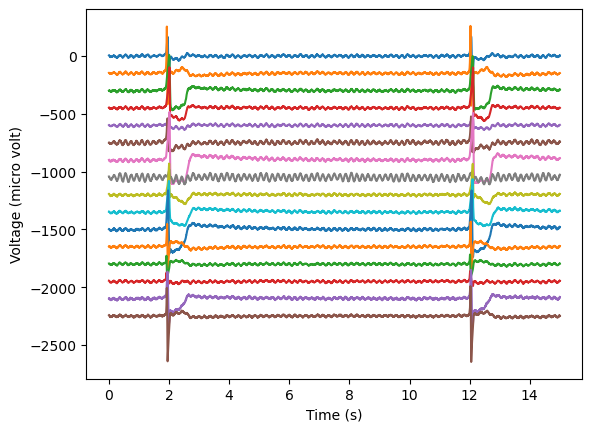

In [36]:
%matplotlib inline
sampling_rate = 10000

cutoff_frequency = 1000

data_path = "E:\Desktop\omipolar\DataPlotting\DrugData\CO4_3_17\co4 day 4 10 uM isoproterenol died_240317_185218\co4 day 4 10 uM isoproterenol_240317_185218.rhs"
data_path_2 = "E:\Desktop\omipolar\DataPlotting\DrugData\CO4_3_17\co4 day 4 10 uM isoproterenol died_240317_185218\co4 day 4 10 uM isoproterenol_240317_185318.rhs"

data_path = "..\ExampleData\Comparing_min_1.rhs"
data_path_2 = "..\ExampleData\Comparing_min_2.rhs"

processed_data = preprocessing.processingPipline(data_path, data_path, cutoff=cutoff_frequency,fs_new= sampling_rate)
available_data = processed_data
target_indeces = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
target_data = available_data[target_indeces]
target_data_copy = target_data.copy()
preprocessing.plotWaves(available_data, target_indeces, start= 30000, sample= 15000)

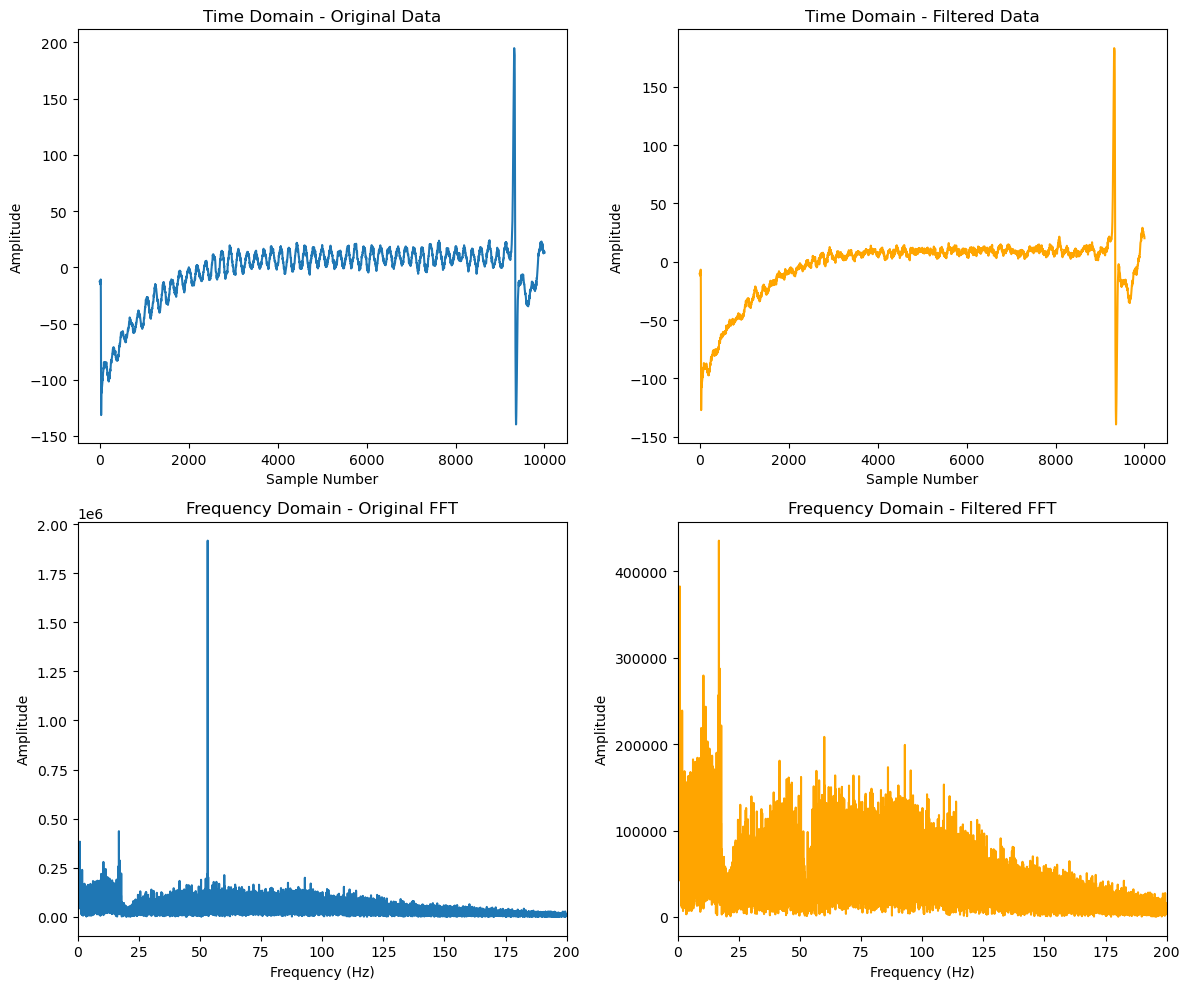

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
prepare_filter = True
fs = sampling_rate  # Sampling rate in Hz
lowcut = 16  # Low cut frequency in Hz
highcut = 17  # High cut frequency in Hz
lowcut_2 = 52
highcut_2 = 54
lowcut_3 = 59
highcut_3 = 61
%matplotlib inline
if (prepare_filter):
    channel = target_data_copy[:,60*fs:120*fs][0]
    # Create the bandstop filter to remove inference
    b, a = butter(N=1, Wn=[lowcut, highcut], btype='bandstop', fs=fs)

    b_2, a_2 = butter(N=1, Wn=[lowcut_2, highcut_2], btype='bandstop', fs=fs)

    b_3, a_3 = butter(N=1, Wn=[lowcut_3, highcut_3], btype='bandstop', fs=fs)
     # Apply the filter
    filtered_data = filtfilt(b_2,a_2, channel)

    # Compute the FFT of the original and filtered data
    frequencies = np.fft.rfftfreq(channel.size, d=1./fs)
    original_fft = np.abs(np.fft.rfft(channel))
    filtered_fft = np.abs(np.fft.rfft(filtered_data))

    # Plotting
    plt.figure(figsize=(12, 10))

    # Time domain - original data
    plt.subplot(2, 2, 1)
    plt.plot(channel[:fs], label='Original Data')
    plt.title('Time Domain - Original Data')
    plt.xlabel('Sample Number')
    plt.ylabel('Amplitude')

    # Time domain - filtered data
    plt.subplot(2, 2, 2)
    plt.plot(filtered_data[:fs], label='Filtered Data', color='orange')
    plt.title('Time Domain - Filtered Data')
    plt.xlabel('Sample Number')
    plt.ylabel('Amplitude')

    # Frequency domain - original FFT
    plt.subplot(2, 2, 3)
    plt.plot(frequencies, original_fft, label='Original FFT')
    plt.xlim([0,200])
    plt.title('Frequency Domain - Original FFT')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    #plt.xlim(0, fs/2)

    # Frequency domain - filtered FFT
    plt.subplot(2, 2, 4)
    plt.plot(frequencies, filtered_fft, label='Filtered FFT', color='orange')
    plt.xlim([0,200])
    plt.title('Frequency Domain - Filtered FFT')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    #plt.xlim(0, fs/2)

    plt.tight_layout()
    plt.show()


In [38]:
direction = np.zeros((target_data.shape[0],1))+1

%matplotlib inline

bpm_over_time, peaks_neo = process_electrodes(target_data[:,60*sampling_rate:120*sampling_rate], sampling_rate, threshold_val=[1,12])
print(len(peaks_neo[1]))
peaks = find_peak_based_on_reference_channel(target_data[:,60*sampling_rate:120*sampling_rate],3,direction, 
                                        peak_range= (int(15*sampling_rate/1000),int(15*sampling_rate/1000)), sd = 2, multi= -1,reference_peak=peaks_neo[0])
print(peaks.shape)
largest_slop = find_activation_slope(target_data[:,60*sampling_rate:120*sampling_rate],3,
                                        peak_range= (int(15*sampling_rate/1000),int(15*sampling_rate/1000)), sd = 2, multi= -1,
                                        reference_peak=peaks_neo[1][1:]) #list(peaks[0][1:-1]))# peaks_neo[1][1:])

peaks_save = peaks.copy()
latency = np.mean(largest_slop - np.min(largest_slop, axis=0), axis= 1)
peaks = largest_slop
filtered_data = target_data[:,60*sampling_rate:120*sampling_rate]
#peaks = peaks_neo
for i in range(target_data.shape[0]):    
    # filtered_data[i] = filtfilt(b, a, target_data[i,60000:120000])
    if i in [4,7]:
        filtered_data[i] = filtfilt(b, a, target_data[i,60*sampling_rate:120*sampling_rate])
        filtered_data[i] = filtfilt(b_2, a_2,filtered_data[i])
        filtered_data[i] = filtfilt(b_3, a_3,filtered_data[i])
        filtered_data[i] = target_data_copy[i,60*sampling_rate:120*sampling_rate]
        largest_slop[i] = find_activation_slope(filtered_data,3,
                                    peak_range= (0,250), sd = 2, multi= -1,reference_peak=peaks_neo[1][1:])[i] #list(peaks[0][1:-1]))# peaks_neo[1][1:])
        peaks[i] = largest_slop[i]
    else:
        filtered_data[i] = filtfilt(b_2, a_2, target_data[i,60*sampling_rate:120*sampling_rate])
        filtered_data[i] = target_data_copy[i,60*sampling_rate:120*sampling_rate]
        largest_slop[i] = find_activation_slope(filtered_data,3,
                                    peak_range= (0,250), sd = 2, multi= -1,reference_peak=peaks_neo[1][1:])[i]
        peaks[i] = largest_slop[i]

largest_slop = largest_slop[:,:-1]
peaks = largest_slop
latency = np.mean(largest_slop - np.min(largest_slop, axis=0), axis= 1)

peaks_save = peaks_save[:,:-1]
latency_peak = np.mean(peaks_save - np.min(peaks_save, axis=0), axis= 1)

55
(16, 56)


In [39]:
latency_all = (largest_slop - np.min(largest_slop, axis=0))

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import linear_sum_assignment

def rank_confusion_matrix(peaks):
    # Assuming peaks is defined elsewhere in your code with shape (number of channels, number of spikes)
    num_spikes = peaks.shape[1]
    num_channels = peaks.shape[0]

    # Initialize the matrix to hold the firing order of channels for each spike
    firing_order_matrix = np.zeros((num_spikes, num_channels), dtype=int)

    # For each spike, find the channel that fires first, then second, and so on
    for spike in range(num_spikes):
        firing_order = np.argsort(peaks[:, spike])
        firing_order_matrix[spike, :] = firing_order

    confusion_matrix_like = np.zeros((num_channels, num_channels))

    # Build the matrix where rows are firing orders and columns are channels
    for i in range(num_spikes):
        for j in range(num_channels):
            channel = firing_order_matrix[i, j]
            confusion_matrix_like[j, channel] += 1

    # Plotting the "confusion matrix"
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix_like, annot=True, cmap="YlGnBu", fmt="g",
                xticklabels=[f"Channel {i+1}" for i in range(num_channels)],
                yticklabels=[f"Order {i+1}" for i in range(num_channels)])
    plt.title('Channel Firing Order Across Spikes')
    plt.xlabel('Channels')
    plt.ylabel('Firing Order')
    plt.show()

    # Convert the problem to a maximization problem for Hungarian algorithm
    cost_matrix = confusion_matrix_like.max() - confusion_matrix_like

    # Apply the Hungarian algorithm to find the optimal assignment
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Create a new sorted confusion matrix based on column assignment
    sorted_confusion_matrix = confusion_matrix_like[:, col_ind]

    # Accuracy based on sorted columns and their original firing orders
    accuracy = np.trace(sorted_confusion_matrix) / np.sum(sorted_confusion_matrix)

    # Plotting the sorted "confusion matrix"
    plt.figure(figsize=(10, 8))
    sns.heatmap(sorted_confusion_matrix, annot=True, cmap="YlGnBu", fmt="g",
                xticklabels=[f"Channel {col+1}" for col in col_ind], 
                yticklabels=[f"Order {i+1}" for i in range(num_channels)])
    plt.title(f'Sorted Channel Firing Order Across Spikes: Accuracy = {accuracy:.4f}')
    plt.xlabel('Channels')
    plt.ylabel('Firing Order')
    plt.show()

    return sorted_confusion_matrix, col_ind  # Returning both the matrix and the sorted indices



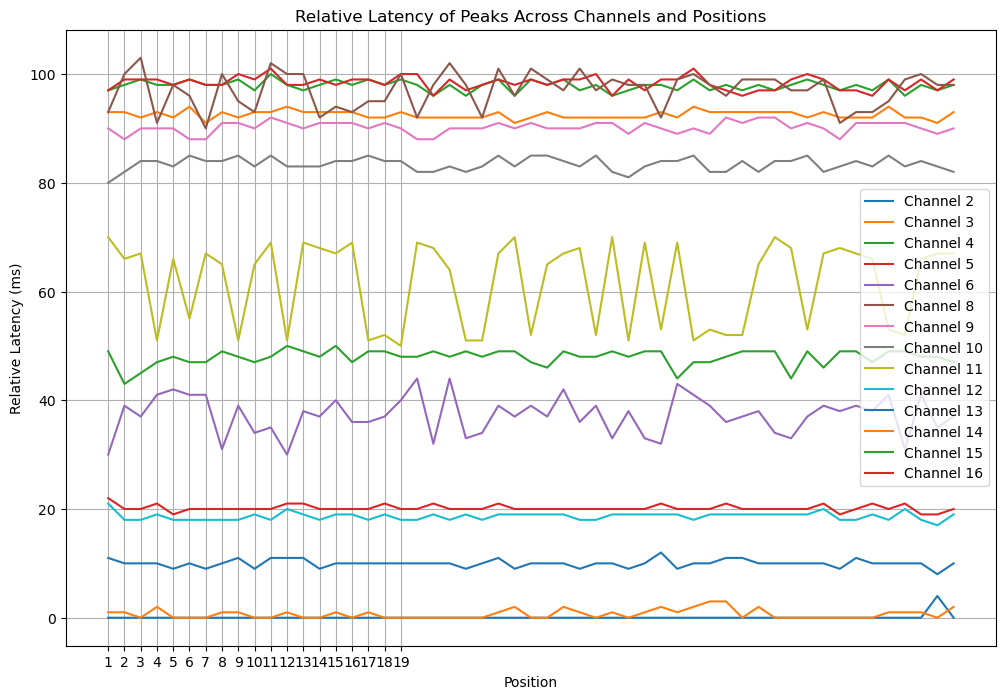

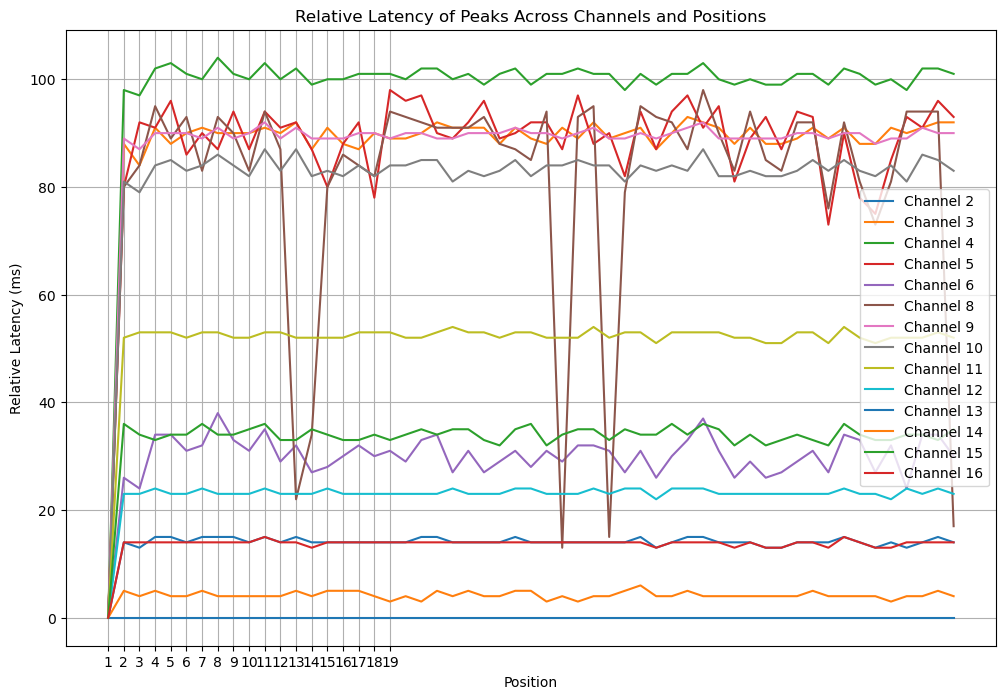

In [42]:
ranks = peak_rank_time(largest_slop)
ranks = peak_rank_time(peaks_save)

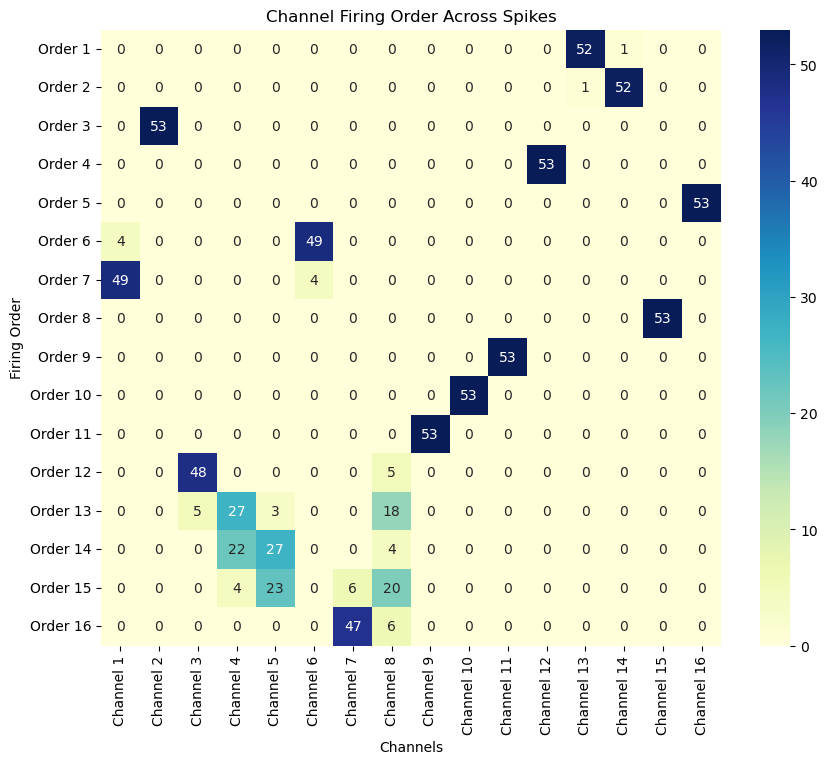

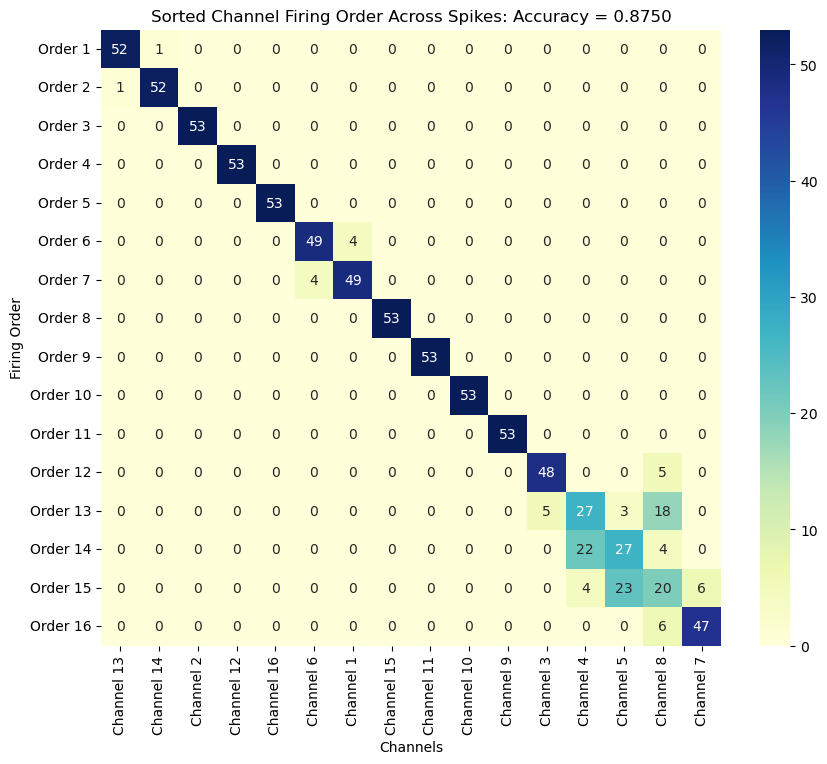

In [43]:
confusion_mat,col_ind = rank_confusion_matrix(largest_slop)


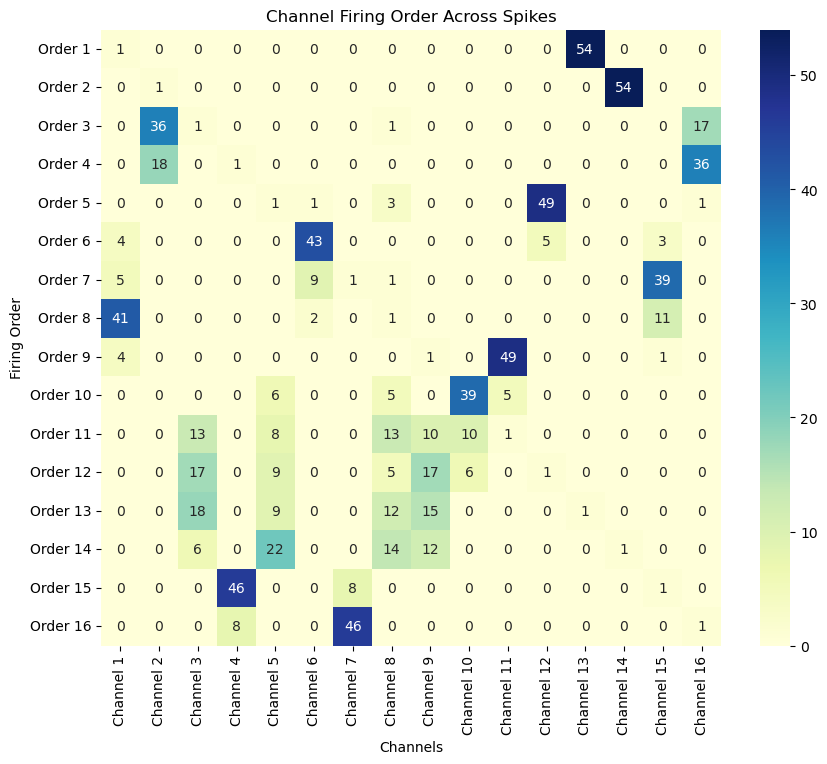

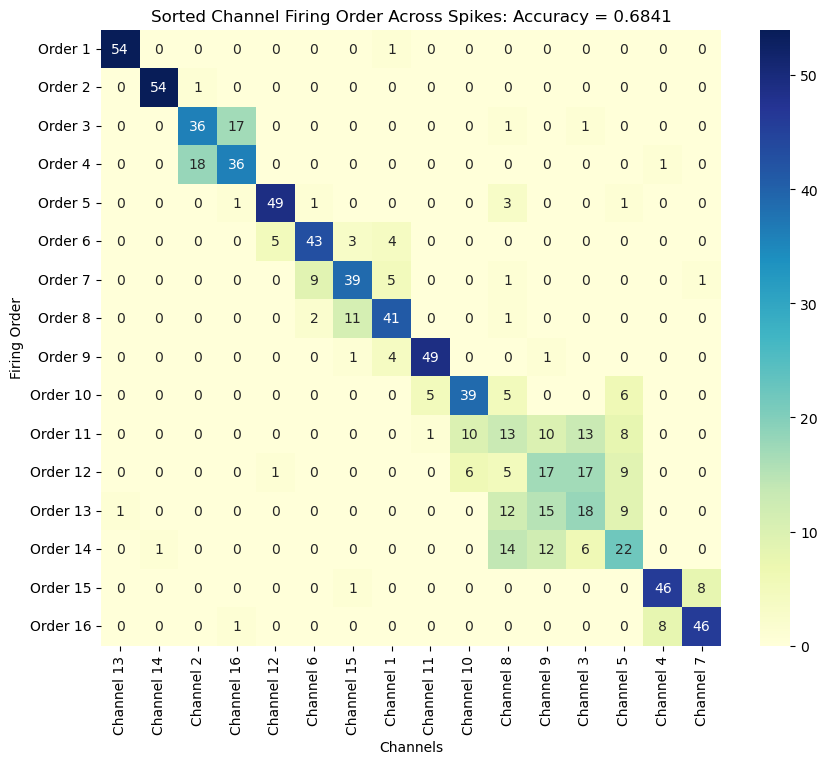

In [44]:
confusion_mat,col_ind = rank_confusion_matrix(peaks_save)


4.235849056603773 0.09335333491964519
0.9981132075471697 0.07134969962712846
9.250943396226415 0.0716981132075477
9.784905660377358 0.09396150639991531
9.835849056603772 0.12146020331646118
3.7226415094339615 0.3516223904229908
10.139622641509435 0.08542816168054156
9.699999999999998 0.326791145581071
9.018867924528301 0.10649936446543423
8.343396226415095 0.11737608313204385
6.154716981132076 0.768867345757393
1.8660377358490567 0.06988777048095142
0.007547169811320755 0.05442341547870173
0.06603773584905662 0.08454851510342672
4.79056603773585 0.14571120434949308
2.016981132075472 0.05741556247057718
(16, 53)


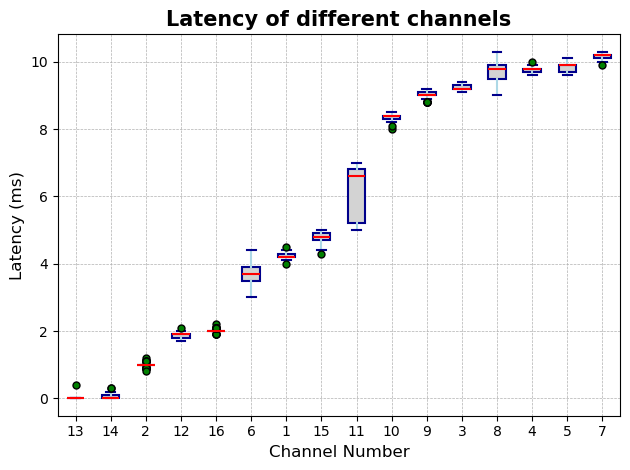

In [45]:
latency_all_ms = latency_all/10
for i in range(latency_all_ms.shape[0]):
    print(np.mean(latency_all_ms[i]), np.std(latency_all_ms[i]))
print(latency_all_ms.shape) #(16,53)
# Calculating the means of each row
means = np.mean(latency_all_ms, axis=1)

# Sorting the means and corresponding rows
sorted_indices = np.argsort(means)
sorted_data = latency_all_ms[sorted_indices]

# Generating channel numbers based on sorted indices (+1 for human-readable format)
channel_numbers = [f"{i+1}" for i in sorted_indices]

# Plotting
fig, ax = plt.subplots()
boxprops = dict(linestyle='-', linewidth=1.5, color='darkblue')
whiskerprops = dict(linestyle='-', linewidth=1.5, color='lightblue')
capprops = dict(linestyle='-', linewidth=1.5, color='darkblue')
medianprops = dict(linestyle='-', linewidth=1.5, color='red')
flierprops = dict(marker='o', markerfacecolor='green', markersize=5, linestyle='none')

box = ax.boxplot(sorted_data.T, labels=channel_numbers, vert=True, patch_artist=True,
                 boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops,
                 medianprops=medianprops, flierprops=flierprops)

for patch in box['boxes']:
    patch.set_facecolor('lightgrey')

ax.set_title('Latency of different channels', fontsize=15, fontweight='bold')
ax.set_xlabel('Channel Number', fontsize=12)
ax.set_ylabel('Latency (ms)', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
